# tensorflow2-基础CNN网络
![](https://adeshpande3.github.io/assets/Cover.png)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

1.14.0


## 1.构造数据

In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

## 2.构造网络

In [5]:
model = keras.Sequential()


### 卷积层
![](http://cs231n.github.io/assets/cnn/depthcol.jpeg)

In [6]:
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))


W0624 11:21:05.108710 140297471797056 deprecation.py:506] From /home/yanjun/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 池化层
![](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

In [7]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

### 全连接层

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# 分类层
model.add(layers.Dense(10, activation='softmax'))

## 3.模型配置

In [9]:
model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


## 4.模型训练

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 33s 614us/sample - loss: 1.5167 - acc: 0.5774 - val_loss: 1.0446 - val_acc: 0.6438
Epoch 2/5
54000/54000 [==============================] - 31s 570us/sample - loss: 0.4037 - acc: 0.8866 - val_loss: 0.1669 - val_acc: 0.9570
Epoch 3/5
54000/54000 [==============================] - 33s 618us/sample - loss: 0.1251 - acc: 0.9661 - val_loss: 0.1056 - val_acc: 0.9708
Epoch 4/5
54000/54000 [==============================] - 32s 600us/sample - loss: 0.0840 - acc: 0.9759 - val_loss: 0.1003 - val_acc: 0.9743
Epoch 5/5
54000/54000 [==============================] - 32s 594us/sample - loss: 0.0657 - acc: 0.9804 - val_loss: 0.0980 - val_acc: 0.9757


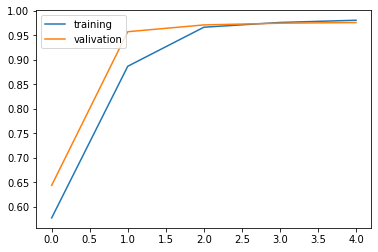

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [12]:
res = model.evaluate(x_test, y_test)


10000/10000 [==============================] - 3s 279us/sample - loss: 0.1117 - acc: 0.9724
